In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# ----required Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Fraud.csv")



```
# ---------problem loading all values of dataset
```



In [25]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
872850,42,CASH_IN,115524.39,C318133495,21496.00,137020.39,C1558670060,0.00,0.00,0.0,0.0
872851,42,TRANSFER,427621.76,C1356866433,137020.39,0.00,C1100767002,6284593.39,6712215.15,0.0,0.0
872852,42,CASH_OUT,122654.14,C2066761451,16461.00,0.00,C511992520,1094493.03,1217147.16,0.0,0.0
872853,42,TRANSFER,868754.37,C746266202,495706.00,0.00,C1036125308,212858.53,1081612.90,0.0,0.0


**1. Data cleaning including missing values, outliers and multi-collinearity.**

In [24]:
print(df.shape)

(872855, 11)


In [8]:
print(df.describe())

                step        amount  oldbalanceOrg  newbalanceOrig  \
count  872855.000000  8.728550e+05   8.728550e+05    8.728550e+05   
mean       22.508564  1.636046e+05   8.787303e+05    8.993699e+05   
std        11.318985  2.644468e+05   2.977924e+06    3.014739e+06   
min         1.000000  1.000000e-01   0.000000e+00    0.000000e+00   
25%        13.000000  1.302999e+04   0.000000e+00    0.000000e+00   
50%        18.000000  8.078102e+04   1.618200e+04    0.000000e+00   
75%        35.000000  2.210624e+05   1.456865e+05    1.868462e+05   
max        42.000000  1.000000e+07   3.893942e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    8.728550e+05    8.728550e+05  872855.000000        872855.0  
mean     9.855127e+05    1.133610e+06       0.000561             0.0  
std      2.311315e+06    2.441360e+06       0.023687             0.0  
min      0.000000e+00    0.000000e+00       0.000000             0.0  
25%      0.000000e+00  

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872855 entries, 0 to 872854
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            872855 non-null  int64  
 1   type            872855 non-null  object 
 2   amount          872855 non-null  float64
 3   nameOrig        872855 non-null  object 
 4   oldbalanceOrg   872855 non-null  float64
 5   newbalanceOrig  872855 non-null  float64
 6   nameDest        872855 non-null  object 
 7   oldbalanceDest  872855 non-null  float64
 8   newbalanceDest  872855 non-null  float64
 9   isFraud         872855 non-null  float64
 10  isFlaggedFraud  872855 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 73.3+ MB
None


In [10]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [11]:
#checking multi-collinearity

In [12]:
dfc = df.copy()
dfc['type']=dfc['type'].map({'PAYMENT':1 ,'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5})

# for machine readable > object to int

In [13]:
dfc = dfc.drop(columns = ['nameOrig','nameDest','isFraud','isFlaggedFraud'])

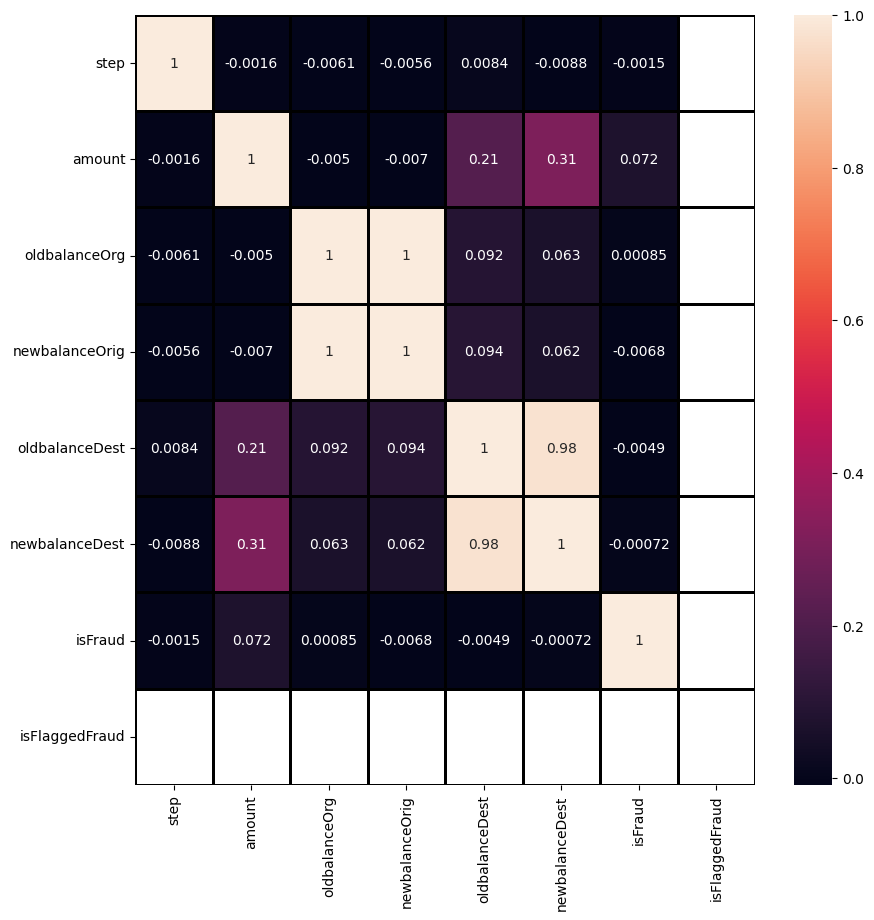

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linecolor = 'black', linewidths = 1)
plt.show()

In [15]:
# oldbalanceDest and newbalanceDest 
# newbalanceDest and oldbalanceDest
#   having strong Correlation

# oldbalanceOrg and oldbalanceDest
# newbalanceOrig and oldbalanceDest
# oldbalanceDest and oldbalanceOrg
# oldbalanceDest and newbalanceOrig
#   having Correlation

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Detecting Multicollinearity with VIF

#vif_feature = ['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

vif_data = pd.DataFrame()                         
vif_data["feature"] = dfc.columns
vif_data["VIF"] = [variance_inflation_factor(dfc.values, i)
                          for i in range(len(dfc.columns))]
print(vif_data)

          feature         VIF
0            step    2.888220
1            type    4.220058
2          amount    1.983962
3   oldbalanceOrg  843.137415
4  newbalanceOrig  857.222035
5  oldbalanceDest   34.386109
6  newbalanceDest   37.033517


In [17]:
#  This VIF indicating that these two variables i.e., oldbalanceOrg and newbalanceOrig are highly correlated

**2. Describe your fraud detection model in elaboration.**

In [18]:
df.loc[df.isFraud == 1].type.values
# is seams fraud has done by 'TRANSFER' and 'CASH_OUT' only.

array(['TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER',
       'CASH_OUT', 'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER',
       'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'CASH_OUT', 'TRANSFER',
       'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT',
       'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER',
       'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT',
       'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER',
       'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT',
       'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER',
       'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT',
       'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER',
       'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT',
       'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER',
       'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT',
       'TRANSFER', 'CASH_OUT', 'TRANSFER', 'CASH_OUT', 'TRANSF

In [22]:
df_transfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
print('No. of Fraud by Transfer - {}'.format(len(df_transfer)))

No. of Fraud by Transfer - 237


In [23]:
df_cashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
print('No. of Fraud by CashOut - {}'.format(len(df_cashout)))

No. of Fraud by CashOut - 253


**3. How did you select variables to be included in the model?**

In [ ]:
# Thus the fraud had done by two 'Type' of Transaction 
# 1. by 'TRANSFER'
# 2. by 'CASH_OUT'

In [ ]:
# As checked by multi-collinearity with VIF, oldbalanceOrg and newbalanceOrig 
# are highly correlated which had helped to select the model. 

**4. Demonstrate the performance of the model by using best set of tools.**

**5. What are the key factors that predict fraudulent customer?**

**6. Do these factors make sense? If yes, How? If not, How not?**

**7. What kind of prevention should be adopted while company update its infrastructure?**

**8. Assuming these actions have been implemented, how would you determine if they work?**